<a href="https://colab.research.google.com/github/Thevaibhavraina/SPIT-LAB/blob/main/lab_2_2_Analyze_statistical_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import scipy.stats
import statsmodels.api as sm
#import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.stattools import jarque_bera

In [4]:
%matplotlib inline

In [5]:
url = 'https://github.com/duchesnay/pystatsml/raw/master/datasets/salary_table.csv'
salary = pd.read_csv(url)

In [6]:
# Load iris datset
iris = sm.datasets.get_rdataset("iris").data
iris.columns = [s.replace('.', '') for s in iris.columns]

In [7]:
n = 10
x = np.random.normal(loc=1.78, scale=.1, size=n)
y = np.random.normal(loc=1.66, scale=.1, size=n)

xbar = np.mean(x)
assert xbar == np.sum(x) / x.shape[0]

xvar = np.var(x, ddof=1)
assert xvar == np.sum((x - xbar) ** 2) / (n - 1)

xycov = np.cov(x, y)
print(xycov)

ybar = np.sum(y) / n
assert np.allclose(xycov[0, 1], np.sum((x - xbar) * (y - ybar)) / (n - 1))
assert np.allclose(xycov[0, 0], xvar)
assert np.allclose(xycov[1, 1], np.var(y, ddof=1))

[[ 0.00830139 -0.00126613]
 [-0.00126613  0.00595736]]


In [8]:
iris.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SepalLength    5.843333
SepalWidth     3.057333
PetalLength    3.758000
PetalWidth     1.199333
dtype: float64

In [9]:
iris.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


SepalLength    0.828066
SepalWidth     0.435866
PetalLength    1.765298
PetalWidth     0.762238
dtype: float64

In [10]:
X = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']].values
iris.columns
X.mean(axis=0)

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [11]:
X.std(axis=0, ddof=1)

array([0.82806613, 0.43586628, 1.76529823, 0.76223767])

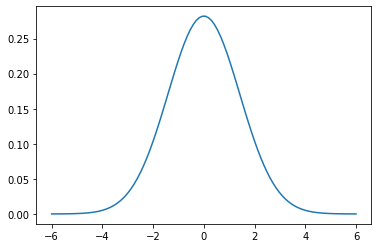

In [12]:
mu = 0 # mean
variance = 2 #variance
sigma = np.sqrt(variance) #standard deviation",
x = np.linspace(mu - 3 * variance, mu + 3 * variance, 100)
_ = plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))

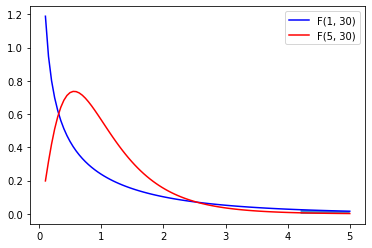

In [13]:
fvalues = np.linspace(.1, 5, 100)

# pdf(x, df1, df2): Probability density function at x of F.
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 1, 30), 'b-', label="F(1, 30)")
plt.plot(fvalues, scipy.stats.f.pdf(fvalues, 5, 30), 'r-', label="F(5, 30)")
plt.legend()

# cdf(x, df1, df2): Cumulative distribution function of F.
# ie.
proba_at_f_inf_3 = scipy.stats.f.cdf(3, 1, 30) # P(F(1,30) < 3)

# ppf(q, df1, df2): Percent point function (inverse of cdf) at q of F.
f_at_proba_inf_95 = scipy.stats.f.ppf(.95, 1, 30) # q such P(F(1,30) < .95)
assert scipy.stats.f.cdf(f_at_proba_inf_95, 1, 30) == .95

# sf(x, df1, df2): Survival function (1 - cdf) at x of F.
proba_at_f_sup_3 = scipy.stats.f.sf(3, 1, 30) # P(F(1,30) > 3)
assert  proba_at_f_inf_3 + proba_at_f_sup_3 == 1

# p-value: P(F(1, 30)) < 0.05
low_proba_fvalues = fvalues[fvalues > f_at_proba_inf_95]
plt.fill_between(low_proba_fvalues, 0, scipy.stats.f.pdf(low_proba_fvalues, 1, 30),
                 alpha=.8, label="P < 0.05")
plt.show()


Text(0.5, 0, 'Distribution of the number of head over 3 flip under the null hypothesis')

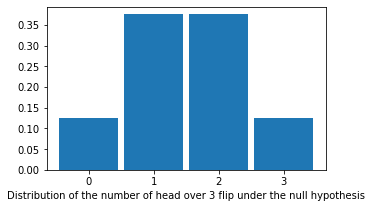

In [14]:
plt.figure(figsize=(5, 3))
plt.bar([0, 1, 2, 3], [1/8, 3/8, 3/8, 1/8], width=0.9)
_ = plt.xticks([0, 1, 2, 3], [0, 1, 2, 3])
plt.xlabel("Distribution of the number of head over 3 flip under the null hypothesis")

0.01760010010885238


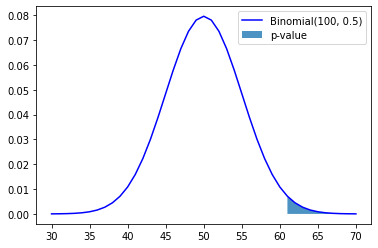

In [15]:
succes = np.linspace(30, 70, 41)
plt.plot(succes, scipy.stats.binom.pmf(succes, 100, 0.5),
         'b-', label="Binomial(100, 0.5)")
upper_succes_tvalues = succes[succes > 60]
plt.fill_between(upper_succes_tvalues, 0,
                 scipy.stats.binom.pmf(upper_succes_tvalues, 100, 0.5),
                 alpha=.8, label="p-value")
_ = plt.legend()


pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print(pval)

In [16]:
sccess_h0 = scipy.stats.binom.rvs(100, 0.5, size=10000, random_state=4)
print(sccess_h0)

pval_rnd = np.sum(sccess_h0 >= 60) / (len(sccess_h0) + 1)
print("P-value using monte-carlo sampling of the Binomial distribution under H0=",
      pval_rnd)

[60 52 51 ... 45 51 44]
P-value using monte-carlo sampling of the Binomial distribution under H0= 0.025897410258974102


In [17]:
x = [1.83,  1.83,  1.73,  1.82,  1.83,  1.73,  1.99,  1.85,  1.68,  1.87]

xbar = np.mean(x)  # sample mean
mu0 = 1.75  # hypothesized value
s = np.std(x, ddof=1)  # sample standard deviation
n = len(x)  # sample size

print(xbar)

tobs = (xbar - mu0) / (s / np.sqrt(n))
print(tobs)

1.816
2.3968766311585883


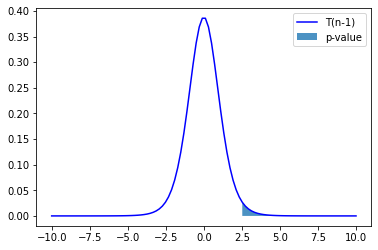

In [18]:
tvalues = np.linspace(-10, 10, 100)
plt.plot(tvalues, scipy.stats.t.pdf(tvalues, n-1), 'b-', label="T(n-1)")
upper_tval_tvalues = tvalues[tvalues > tobs]
plt.fill_between(upper_tval_tvalues, 0, scipy.stats.t.pdf(upper_tval_tvalues, n-1),
                 alpha=.8, label="p-value")
_ = plt.legend()

In [19]:
  n = 50
x = np.random.normal(size=n)
y = 2 * x + np.random.normal(size=n)

# Compute with scipy
cor, pval = scipy.stats.pearsonr(x, y)
print(cor, pval)

0.9006604533905276 5.335043002652811e-19


In [20]:
height = np.array([ 1.83,  1.83,  1.73,  1.82,  1.83,  1.73,  1.99,  1.85,  1.68,  1.87,
                    1.66,  1.71,  1.73,  1.64,  1.70,  1.60,  1.79,  1.73,  1.62,  1.77])

grp = np.array(["M"] * 10 + ["F"] * 10)

# Compute with scipy
scipy.stats.ttest_ind(height[grp == "M"], height[grp == "F"], equal_var=True)

Ttest_indResult(statistic=3.5511519888466885, pvalue=0.00228208937112721)

      Species  SepalLength  SepalWidth  PetalLength  PetalWidth
0      setosa        5.006       3.428        1.462       0.246
1  versicolor        5.936       2.770        4.260       1.326
2   virginica        6.588       2.974        5.552       2.026
      Species  SepalLength  SepalWidth  PetalLength  PetalWidth
0      setosa     0.352490    0.379064     0.173664    0.105386
1  versicolor     0.516171    0.313798     0.469911    0.197753
2   virginica     0.635880    0.322497     0.551895    0.274650


,sum_sq,df,F,PR(>F)
Species,63.212133,2.0,119.264502,1.669669e-31
Residual,38.956200,147.0,NaN,NaN


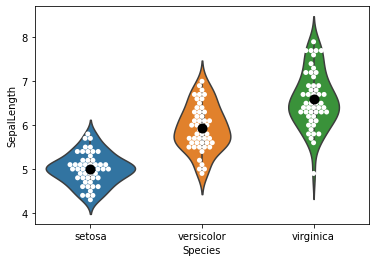

In [21]:
# Group means
means = iris.groupby("Species").mean().reset_index()
print(means)

# Group Stds (equal variances ?)
stds = iris.groupby("Species").std(ddof=1).reset_index()
print(stds)

# Plot groups
ax = sns.violinplot(x="Species", y="SepalLength", data=iris)
ax = sns.swarmplot(x="Species", y="SepalLength", data=iris,
                   color="white")
ax = sns.swarmplot(x="Species", y="SepalLength",  color="black", data=means, size=10)

# ANOVA
lm = smf.ols('SepalLength ~ Species', data=iris).fit()
sm.stats.anova_lm(lm, typ=2) # Type 2 ANOVA DataFrame
